In [ ]:
import gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
#define training data
sentences=[['this','is','the','first','sentence','for','word2vec'],
['this','is','the','second','sentence'],
['yet','another','sentence'],
['one','more','sentence'],
['and','the','final','sentence']]


In [ ]:

#train model
model=Word2Vec(sentences,min_count=1,size=50,window=3,sg=1)
#summarise the loaded model
print(model)

Word2Vec(vocab=14, size=50, alpha=0.025)


In [ ]:
#summarise vocabulary
words=list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [ ]:
#access vector for the word
print(model['sentence'])
#save model
model.save('model.bin')

[ 0.00771     0.00430499  0.00158024 -0.002139    0.00492318  0.00720352
 -0.00927765  0.00100679 -0.00917118 -0.00532018  0.00707447 -0.00989121
  0.00234352  0.0034243   0.00625336 -0.00063683  0.00314976  0.00790765
 -0.00972815  0.00510126 -0.00923626 -0.00176653 -0.00600562  0.0091635
  0.00168353  0.00328367 -0.00371396  0.00401075 -0.00528352  0.00857754
 -0.00502083 -0.00446338  0.00553988 -0.0041877   0.00250037  0.00258665
  0.00834491 -0.00955167  0.00573214  0.00824814 -0.00757693 -0.00549982
  0.00265436 -0.00024856 -0.00834449  0.00530914  0.00910341  0.00890559
  0.00469796 -0.00543971]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
#load model
new_model=Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=50, alpha=0.025)


In [ ]:
model.similarity('first','second')
model.most_similar('word2vec')[:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('second', 0.34835928678512573), ('more', 0.1857663094997406)]

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
#fit a 2d PCA model to the vector
x=model[model.wv.vocab]
pca=PCA(n_components=2)
result=pca.fit_transform(x)
#create a scatter plot of projection
pyplot.scatter(result[:,0],result[:,1])
words=list(model.wv.vocab)
for i,word in enumerate(words):
  pyplot.annotate(word,xy=(result[i,0],result[i,1]))
  pyplot.show() 

In [ ]:
import gensim.downloader as api
word2vec=api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


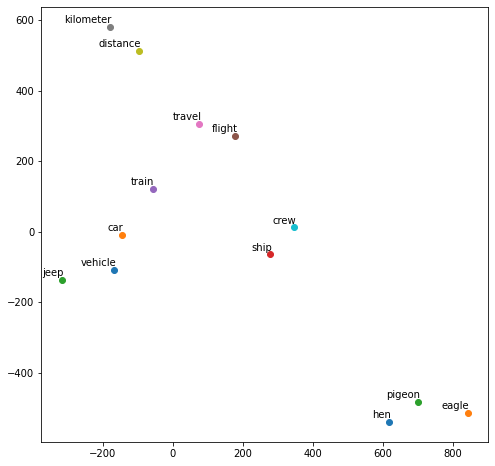

In [ ]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]
vocab2=["vehicle","car","jeep","ship","train","flight","travel","kilometer","distance","crew","hen","eagle","pigeon"]
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab2:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec)
